# Instrumental VEI background

In this tutorial, we will attempt to draft an instrumental (seismic) VEI scale. One scale will be based on Reduced Displacement, another will use Energy Magnitude directly, and the third will be based on modelling volcanic events by a single force. First, some background on these.


# 1. Reduced Displacement

Reduced Displacement ($D_R$) is a measurement for comparing the sizes of different seismic signals, such as those corresponding to volcanic eruptions and lava dome collapses.

Seismometers are (usually) velocity transducers - they generate an electric signal (in Volts) that is proportional to the velocity of ground shaking within a certain passband. Outside that passband, the seismometer no longer generates a voltage proportional to ground velocity. This voltage signal has to be digitized (using an analog-to-digital converter built into the datalogger or on a computer at the observatory), converting the signal units from Volts to digitizer "Counts" before it can be examined on a computer. This is a raw seismic signal. To convert this raw seismic signal to a velocity seismogram, we must "remove the instrument response". Then by carefully integrating the velocity seismogram, we will have a displacement seismogram. So we have raw, velocity, and displacement, seismograms.

RSAM is just one of several related downsampled seismic measurements. Some others supported by the `SAM` package are:

<table>
    <tr><th>Acronym</th><th>Full name</th><th>Computed from a:</th><th>Instrument corrected?</th><th>Geometrically corrected?</th></tr>
    <tr><td>RSAM</td><td><b>Real-time (or Raw) Seismic Amplitude Measurement</b></td><td>Raw seismogram</td><td>N</td><td>N</td></tr>
    <tr><td>VSAM</td><td>Velocity Seismic Amplitude Measurement</td><td>Velocity seismogram</td><td>Y</td><td>N</td></tr>
    <tr><td>DSAM</td><td>Displacement Seismic Amplitude Measurement</td><td>Displacement seismogram</td><td>Y</td><td>N</td></tr>
    <tr><td>RSEM</td><td>Raw Seismic Energy Measurement</td><td>Raw seismogram</td><td>N</td><td>N</td></tr>   
    <tr><td>VSEM</td><td>Velocity Seismic Energy Measurement</td><td>Velocity seismogram</td><td>Y</td><td>N</td></tr>
    <tr><td>$V_R$ and $V_{RS}$</td><td>Reduced Velocity</td><td>VSAM</td><td>Y</td><td>Y</td></tr>  
    <tr><td>$D_R$ and $D_{RS}$</td><td><b>Reduced Displacement</b></td><td>DSAM</td><td>Y</td><td>Y</td></tr>   
    <tr><td>$E_R$</td><td><b>Reduced Energy</b></td><td>VSEM</td><td>Y</td><td>Y</td></tr>     
</table>

## 1.1 Correcting for Geometrical Spreading

How do we compare seismograms recorded at different distances from the same volcano? Or from different volcanoes? One thing we can do is to "reduce" the seismograms to a common distance, e.g. 1 km, by correcting for geometrical spreading. This is the idea behind Reduced Displacement. 

Consider a simple half-space velocity model of uniform density. As body waves propagate to greater distances, the wavefront can be thought of as a hemispherical shell, with surface area $2\pi{r}^2$. If energy is not dissipated inelastically or scattered, the energy per unit area must then diminish $1/{r}^2$. And since amplitude is proportional to the square root of energy, the amplitude of body waves diminishes like 1/r. We call this "geometrical spreading".

Similarly, surface waves can be thought of as a circular (or cylindrical) wavefront, whose circumference increases like $2\pi r$, so energy density diminishes like 1/r and surface wave amplitude as $1/\sqrt(r)$.

Reduced Displacement was introduced by Aki & Koyanagi (1981) as a measurement of volcanic tremor amplitude for Kilaeua. Proportional to seismic moment rate, it is the RMS amplitude of a displacement seismogram, corrected for geometrical spreading. 

For body waves:

$D_{R} = rms(U) r$

where r = distance from source to station, U = displacement

Beyond a few wavelengths, surface waves dominate, and Fehler (1983) determined:

$D_{RS} = rms(U) \sqrt{r \lambda}$

In a series of papers McNutt (1994; 2005; 2008) demonstrated scaling relationships for explosive volcanic eruptions between Reduced Displacement and:
- ash column height
- Volcanic Explosivity Index (Newhall and Self, 1982)
- cross-sectional area of volcanic vent

RSAM is generally more useful for seismic field engineers, because it is unfiltered. Reduced Displacement is generally more useful for scientists, as it is a measurement that can be compared from station to station, even on different volcanoes. 

References:

- Aki, K., Koyanagi, R.Y., 1981. Deep volcanic tremor and magma ascent mechanism under Kilauea, Hawaii. J. Geophys. Res. 86, 7095–7110.
- Fehler, M., 1983. Observations of volcanic tremor at Mount St. Helens Volcano. J. Geophys. Res. 88, 3476–3484.
- McNutt, S.R., 1994. Volcanic tremor amplitude correlated with the Volcanic Explosivity Index and its potential use in determining ash hazards to aviation. Acta Vulcanol. 5, 193–196.
- McNutt, S.R., Nishimura, T., 2008. Volcanic tremor during eruptions: Temporal characteristics, scaling and constraints on conduit size and processes. J. Volcanol. Geotherm. Res., 178, 1, 10-18. https://doi.org/10.1016/j.jvolgeores.2008.03.010.
- Newhall, C.G., Self, S., 1982. The volcanic explosivity index (VEI): an estimate of explosive magnitude for historical volcanism. J. Geophys. Res. 87, 1231–1238.

## 1.2 Computing Reduced Displacement

DSAM is just an instrument-corrected version of RSAM, and $D_R$/$D_{RS}$  is just DSAM corrected for geometrical spreading, and so SAM.py was written to support all these different measurements. Here is an algorithm:

1. Load raw seismic data as an ObsPy Stream object.
2. Load station/instrument response metadata from a StationXML file into an Obspy Inventory object.
3. Remove instrument response to convert Stream object to a displacement seismogram.
4. Compute DSAM data from this displacement seismogram. 
6. Define a fixed source location.
7. Compute distance from station to source (done internally using source and inventory)
8. "Reduce" the DSAM object by multiplying by geometrical spreading correction.

# 2. Energy Magnitude

Ampitude measurements, such as RSAM and Reduced Displacement, do not effectively capture the size of an event because some events of equal amplitude may be of very different durations. So it is useful to estimate the energy of the event. Furthermore, because event energy can range of several orders of magnitude, it is useful to define an energy magnitude.

We compute Reduced Energy ($E_R$, units: J) via the equation:

$E_R = 2 \pi r^{2}  \frac{\rho_{E} c_{E}}{A} \int {S^{2} {U(t)}^2} dt$

(Boatwright, 1980; Johnson and Aster, 2005). 

Since this includes a correction for geometrical spreading, we will call it Reduced Energy ($E_{R}$).

The quantity ---- is similar to RSEM (Real-time Seismic Energy Measurement) but computed on a velocity seismogram rather than a raw seismogram, so we call it VSEM.

And then following Hanks and Kanamori (1???), we define Energy-Magnitude ($M_{E}$) as:

(Started doing this in March 2000 at Montserrat Volcano Observatory... lots of complaints!)

$M_{E} = \frac{2}{3} log_{10} E_R - 3.2$

(The factor 3.2 might change depending on velocity structure).

We will now compute $E_{R}$ and $M_{E}$ for the same events we examined in the Reduced Displacement tutorial.

References:

- Boatwright, 1980
- Johnson & Aster, 2005
- VSEM?
- Hanks and Kanamori, 1980?

## 2.1 Computing Reduced Energy ($E_R$)

DSAM is just an instrument-corrected version of RSAM, and Reduced Displacement is just DSAM corrected for geometrical spreading, and so SAM.py was written to support all these different measurements. Here is an algorithm:

1. Load raw seismic data as an ObsPy Stream object.
2. Load station/instrument response metadata from a StationXML file into an Obspy Inventory object.
3. Remove instrument response to convert Stream object to a displacement seismogram.
4. Compute DSAM data from this displacement seismogram. 
6. Define a fixed source location.
7. Compute distance from station to source (done internally using source and inventory)
8. "Reduce" the DSAM object by multiplying by geometrical spreading correction.

# 3. Single Force

A vertically-directed volcanic explosion can be modelled as a single force using moment tensor representation. Similarly, a directed blast can be modelled as a titled or horizontal single force. Felix Cardozo plans to make some estimates with MTUQ, and just needs instrument-corrected (displacement) seismograms.

# 4. Methodology

## 4.1 Headers

In [1]:
import os
import sys
import obspy
sys.path.append('lib')
from SAM import DSAM 

# Load raw seismic data - and set units accordingly
DATA_DIR = os.path.join('data')
SDS_DIR = os.path.join(DATA_DIR, 'continuous','SDS')
SAM_DIR = os.path.join(DATA_DIR, 'continuous','SAM')
RESPONSE_DIR = os.path.join(DATA_DIR, 'responses')

## 4.2 Load raw data from SDS archive, and corresponding StationXML

In [2]:
# load 1 channel of data from SDS
mseedfile = os.path.join(SDS_DIR,'2003','MV','MBWH','SHZ.D', 'MV.MBWH..SHZ.D.2003.194' )
st = obspy.read(mseedfile, 'MSEED')

# load instrument response
stationxml = os.path.join(RESPONSE_DIR, 'MV.xml')
inv = obspy.read_inventory(stationxml)

## 4.3 Compute Energy

### 4.3.1 Correct data to velocity seismogram

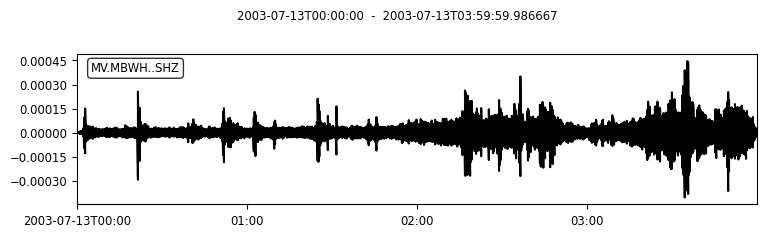

In [3]:
#pre_filt = [0.01, 0.02, 25, 50]
pre_filt = [0.1, 0.2, 18, 25]
stV = st.copy()
stV.remove_response(inventory=inv, pre_filt=pre_filt, output="VEL", plot=False) 
stV.plot();

### 4.3.2 Compute VSEM

In [4]:

#################################################
# So far we just have a velocity seismogram
#################################################

# Generate a Velocity Seismic Energy Measurement (VSEM) object
from SAM import VSEM
vsemObj = VSEM(stream=stV, sampling_interval=60)
print(vsemObj)

             time        energy           VLP            LP            VT
0    1.058054e+09  6.237954e-11  7.263240e-12  3.999897e-09  6.990619e-10
1    1.058054e+09  4.068340e-10  2.326646e-11  2.640933e-08  4.210885e-09
2    1.058055e+09  5.056250e-08  2.224410e-10  3.638353e-06  1.608005e-07
3    1.058055e+09  1.462265e-08  2.350768e-10  1.025831e-06  7.442018e-08
4    1.058055e+09  7.528239e-09  3.982056e-10  5.359782e-07  3.012084e-08
..            ...           ...           ...           ...           ...
235  1.058068e+09  1.034412e-07  1.747246e-09  6.896701e-06  8.401819e-07
236  1.058069e+09  7.542829e-08  6.404522e-10  5.247071e-06  4.954861e-07
237  1.058069e+09  3.921785e-08  4.470905e-10  2.653757e-06  3.041818e-07
238  1.058069e+09  2.556619e-08  1.636275e-09  1.714905e-06  2.144956e-07
239  1.058069e+09  2.631396e-09  2.698171e-11  1.728949e-07  2.575512e-08

[240 rows x 5 columns]
Metrics: energy,VLP,LP,VT
Sampling Interval=60.0 s

MV.MBWH..SHZ: 2003-07-13T00:00:00 to

### 4.3.3 Compute $E_R$
The units of energy, VLP, LP, and VT here are $m^2/s$. But we can convert them to Joules and M_E if we define a sum and call the `sum_energy` method:

{'lat': 16.7164, 'lon': -62.1654}
METRIC:  energy


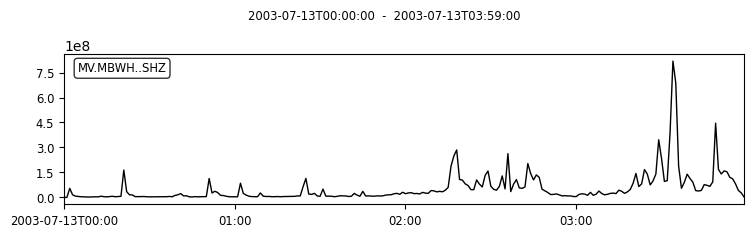

In [5]:
# Define a source location for SHV. Station distances to this lat/lon are used to "reduce" the displacement to 1 km distance.
source = {'lat':16.7164, 'lon':-62.1654}  
print(source)

# Generate a Reduced Energy object, assuming body waves (surfaceWaves=False) and no inelastic attenuation (Q=None)
ERobj = vsemObj.compute_reduced_energy(inv, source, Q=None)
ERobj.plot(metrics='energy')

### 4.3.4 Compute $M_E$

In [6]:
# Compute Energy Magnitude
E, ME = ERobj.sum_energy()

MV.MBWH..SHZ: Joules: 1.27e+10, Magnitude: 4.6
Network: Joules: 1.27e+10, Magnitude: 4.6


## 4.4 Compute Reduced Displacement


### 4.4.1 Correct data to displacement seismogram

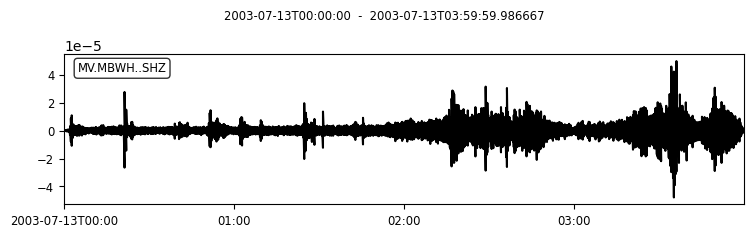

In [7]:
stD = st.copy()
pre_filt = [0.1, 0.2, 18, 25]
stD.remove_response(inventory=inv, pre_filt=pre_filt, output="DISP", plot=False) 
stD.plot();

### 4.4.2 Compute DSAM

In [8]:
from SAM import DSAM
dsamObj = DSAM(stream=stD, sampling_interval=60)
print(dsamObj)

             time           min          mean           max        median  \
0    1.058054e+09  1.588952e-11  6.728210e-08  3.626686e-07  5.376656e-08   
1    1.058054e+09  1.570260e-11  1.708006e-07  8.137179e-07  1.418686e-07   
2    1.058055e+09  1.566130e-09  1.760066e-06  1.146782e-05  1.046728e-06   
3    1.058055e+09  1.052702e-09  1.047802e-06  4.934939e-06  8.954023e-07   
4    1.058055e+09  7.964966e-10  8.073196e-07  3.744794e-06  6.588513e-07   
..            ...           ...           ...           ...           ...   
235  1.058068e+09  2.578717e-09  3.226106e-06  1.348446e-05  2.685698e-06   
236  1.058069e+09  1.395721e-09  2.669204e-06  1.239349e-05  2.247459e-06   
237  1.058069e+09  4.224565e-10  2.119697e-06  9.682509e-06  1.864768e-06   
238  1.058069e+09  1.677478e-10  1.495892e-06  8.179935e-06  1.157973e-06   
239  1.058069e+09  1.296352e-11  4.305649e-07  2.654476e-06  3.148208e-07   

              rms           VLP            LP            VT    fratio  
0  

### 4.4.3 Compute $D_R$

Generate a Reduced Displacement object, assuming body waves (surfaceWaves=False) and no inelastic attenuation (Q=None)

METRIC:  rms


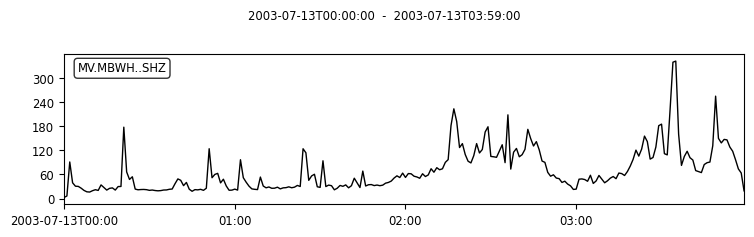

In [9]:
DRobj = dsamObj.compute_reduced_displacement(inv, source, surfaceWaves=False, Q=None)
DRobj.plot(metrics='rms')   

### 4.4.4 Compute $D_{RS}$

METRIC:  rms


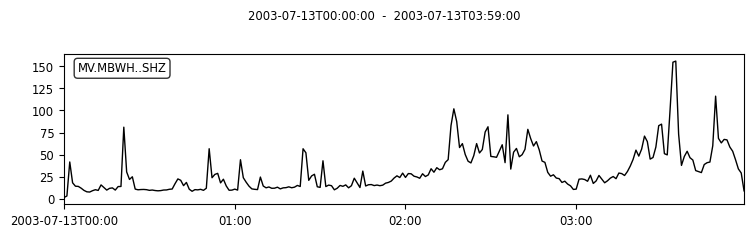

In [10]:
DRSobj = dsamObj.compute_reduced_displacement(inv, source, surfaceWaves=True, Q=None, wavespeed_kms=2.0, peakf=2.0)
DRSobj.plot(metrics='rms')   

### 4.4.5 Compute $M_{DR}$

In [11]:
import numpy as np
import pandas as pd
from SAM import DR, DRS
def magnitude_DR(v, return_dataframe=True):
    correction = 5.5 - np.log10(39142.68)

    if isinstance(v, float):
        m = np.log10(v) + correction
        return round(m, 1)
    elif isinstance(v, DR) or isinstance(v, DRS):
        thisDRobj = v
        ids = thisDRobj.get_seed_ids()
    
        lod = []
        lom = []
        
        for id in ids:
            maxDR = thisDRobj.dataframes[id]['rms'].max() 
            M_DR = np.log10(maxDR) + correction
            #print(f'id={id}, maxDR={maxDR:.1f}, M_DR={M_DR:.1f}')
            lod.append({'id':id, 'maxDR':round(maxDR,1), 'M_DR':round(M_DR,1) }) 
            lom.append(M_DR)
        
    
        if return_dataframe:
            df = pd.DataFrame.from_dict(lod)
            return df
        else:
            return round(np.nanmedian(np.array(lom)),1)
    else:
        return None

In [12]:
print(magnitude_DR(DRobj))
print(magnitude_DR(DRSobj))

             id  maxDR  M_DR
0  MV.MBWH..SHZ  341.5   3.4
             id  maxDR  M_DR
0  MV.MBWH..SHZ  156.0   3.1


The units of $D_R$ and $D_{RS}$ objects are ${cm}^2$.